In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip '/content/gdrive/MyDrive/he1.zip' -d '/content/gdrive/MyDrive/Processed/Data'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/981972resized4rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982013resized1rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982013resized2rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982013resized3rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982013resized4rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982018resized1rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982018resized2rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982018resized3rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982018resized4rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Data/he1/982076resized1rotated_md_he.jpg  
  inflating: /content/gdrive/MyDrive/Processed/Da

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers.core import Flatten, Dense, Dropout, Lambda, Reshape
from keras.layers import Input
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import Conv2D, MaxPooling2D, Activation
import keras.optimizers

In [ ]:
def ConvLayers(layers, model, filters):
  for i in range(layers):   
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(filters, 3,3,activation='relu'))
  model.add(MaxPooling2D((2,2),strides=(1,1),padding="same"))

In [ ]:
def FCLayers(model):
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))

In [ ]:
def VGG16_arc():
  model=Sequential()
  ConvLayers(2,model,64)
  ConvLayers(2,model,128)
  ConvLayers(3,model,256)
  ConvLayers(3,model,512)
  ConvLayers(3,model,512)
  model.add(Flatten())
  FCLayers(model)
  FCLayers(model)
  model.add(Dense(37,activation='sigmoid'))
  #model.add(Dense(3,activation='softmax'))
  return model

In [ ]:
from keras.models import load_model

In [ ]:
#Model compilation
optimizer = keras.optimizers.Adam(lr=0.001, decay=5e-4)
model = VGG16_arc()
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy']) 
#model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [ ]:
model.build(input_shape=(None,224,224,3))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 75, 75, 64)        1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 77, 77, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 128)         7

In [ ]:
import pandas as pd
df=pd.read_csv('/content/sample_data/Galaxy/processedtrainingdffinal.csv')
df = df.sample(frac=1).reset_index(drop=True)
df

,Unnamed: 0,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,Class5.1,Class5.2,Class5.3,Class5.4,Class6.1,Class6.2,Class7.1,Class7.2,Class7.3,Class8.1,Class8.2,Class8.3,Class8.4,Class8.5,Class8.6,Class8.7,Class9.1,Class9.2,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,40929,696555resized3rotated_md_he.jpg,0.798682,0.166134,0.035185,0.000000,0.166134,0.000000,0.166134,0.103960,0.062174,0.000000,0.070057,0.096077,0.000000,0.031218,0.968782,0.048577,0.627060,0.123046,0.000000,0.000000,0.031218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103960,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.103960
1,60722,987246resized2rotated_md_he.jpg,0.742394,0.221263,0.036343,0.032654,0.188609,0.000000,0.188609,0.000000,0.188609,0.153158,0.035451,0.000000,0.000000,0.463691,0.536309,0.000000,0.633952,0.108442,0.000000,0.000000,0.061671,0.309282,0.061671,0.000000,0.031067,0.000000,0.000000,0.032654,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
2,59329,966594resized4rotated_md_he.jpg,0.369166,0.630834,0.000000,0.000000,0.630834,0.254871,0.375963,0.087182,0.543652,0.000000,0.228308,0.255138,0.147389,0.550667,0.449333,0.000000,0.369166,0.000000,0.001227,0.027535,0.000000,0.029249,0.318822,0.173833,0.000000,0.000000,0.000000,0.000000,0.087182,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.087182
3,33178,586538resized4rotated_md_he.jpg,0.549754,0.406490,0.043755,0.202065,0.204425,0.000000,0.204425,0.095896,0.108529,0.060136,0.144289,0.000000,0.000000,0.157140,0.842860,0.000000,0.086089,0.463665,0.000000,0.000000,0.039304,0.036822,0.081014,0.000000,0.000000,0.151506,0.000000,0.050560,0.095896,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.095896
4,38560,662561resized2rotated_md_he.jpg,0.433403,0.544847,0.021750,0.481157,0.063690,0.026390,0.037300,0.063690,0.000000,0.000000,0.036287,0.027403,0.000000,0.000000,1.000000,0.000000,0.000000,0.433403,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.329593,0.030313,0.121252,0.063690,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.063690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246307,32132,571448resized1rotated_md_he.jpg,0.565794,0.374584,0.059622,0.017540,0.357044,0.119564,0.237481,0.146383,0.210661,0.000000,0.160080,0.196964,0.000000,0.087562,0.912438,0.020614,0.484063,0.061117,0.043781,0.000000,0.043781,0.000000,0.000000,0.000000,0.000000,0.000000,0.017540,0.000000,0.000000,0.146383,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.146383
246308,31956,568794resized4rotated_md_he.jpg,0.788711,0.185846,0.025444,0.000000,0.185846,0.000000,0.185846,0.000000,0.185846,0.000000,0.149810,0.000000,0.036036,0.000000,1.000000,0.118433,0.670278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
246309,19533,386677resized2rotated_md_he.jpg,0.618000,0.380000,0.002000,0.000000,0.380000,0.076000,0.304000,0.304000,0.076000,0.050540,0.177460,0.152000,0.000000,0.203000,0.797000,0.085284,0.482040,0.050676,0.025375,0.000000,0.076125,0.101500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.126768,0.177232,0.000000,0.025232,0.000000,0.000000,0.0,0.0,0.278768
246310,10915,262007resized4rotated_md_he.jpg,0.287423,0.699800,0.012777,0.056953,0.642847,0.069679,0.573169,0.333663,0.309185,0.216393,0.129444,0.189710,0.107301,0.048348,0.951652,0.000000,0.137105,0.150318,0.000000,0.000000,0.048348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056953,0.267370,0.000000,0.066293,0.000000,0.000000,0.000000,0.0,0.0,0.333663


In [ ]:
classes = ['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1','Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3','Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3','Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1', 'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6'
]

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(validation_split=0.2)

train_generator = datagenerator.flow_from_dataframe(
    dataframe=df,
    directory="/content/gdrive/MyDrive/Processed/Data/he1/",
    x_col="GalaxyID",
    y_col=classes,
    subset="training",
    batch_size=64,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))
valid_generator = datagenerator.flow_from_dataframe(
    dataframe=df,
    directory="/content/gdrive/MyDrive/Processed/Data/he1/",
    x_col="GalaxyID",
    y_col=classes,
    subset="validation",
    batch_size=64,
    shuffle=True,
    class_mode="raw",
    target_size=(224, 224))
train_step_size = train_generator.n // train_generator.batch_size
validation_step_size = valid_generator.n // valid_generator.batch_size

Found 197050 validated image filenames.
Found 49262 validated image filenames.


In [ ]:
train_step_size

3078

In [ ]:
validation_step_size

769

In [ ]:
import h5py

In [ ]:
import timeit
import matplotlib.pyplot as plt

In [ ]:
model.load_weights('/content/gdrive/MyDrive/Processed_final_2.hdf5')

In [ ]:
from keras import callbacks
start = timeit.default_timer()
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 3, verbose=2, 
                                        restore_best_weights = True)

checkpoint = callbacks.ModelCheckpoint(
    filepath='/content/gdrive/MyDrive/Processed/thirdrunweights.hdf5', verbose=2, save_best_only=True)

new_classifier = model.fit(train_generator,
                           steps_per_epoch=train_step_size,
                           epochs=20,
                           validation_data=valid_generator,
                           validation_steps=validation_step_size,
                           callbacks =[checkpoint,earlystopping],
                           verbose=2,
                           )
end = timeit.default_timer()
print("Time Taken to run the model:",end - start, "seconds")

Epoch 1/20
3078/3078 - 982s - loss: 0.0119 - accuracy: 0.7469 - val_loss: 0.0113 - val_accuracy: 0.7542

Epoch 00001: val_loss improved from inf to 0.01132, saving model to /content/gdrive/MyDrive/Processed/thirdrunweights.hdf5
Epoch 2/20
3078/3078 - 886s - loss: 0.0107 - accuracy: 0.7648 - val_loss: 0.0110 - val_accuracy: 0.7583

Epoch 00002: val_loss improved from 0.01132 to 0.01096, saving model to /content/gdrive/MyDrive/Processed/thirdrunweights.hdf5
Epoch 3/20
3078/3078 - 886s - loss: 0.0101 - accuracy: 0.7736 - val_loss: 0.0103 - val_accuracy: 0.7686

Epoch 00003: val_loss improved from 0.01096 to 0.01034, saving model to /content/gdrive/MyDrive/Processed/thirdrunweights.hdf5
Epoch 4/20
3078/3078 - 889s - loss: 0.0098 - accuracy: 0.7785 - val_loss: 0.0103 - val_accuracy: 0.7701

Epoch 00004: val_loss improved from 0.01034 to 0.01028, saving model to /content/gdrive/MyDrive/Processed/thirdrunweights.hdf5
Epoch 5/20
3078/3078 - 887s - loss: 0.0095 - accuracy: 0.7824 - val_loss: 0.

In [ ]:
model.save('Processed_final_3.hdf5')

In [ ]:
key=model.history.history.keys()
values=model.history.history

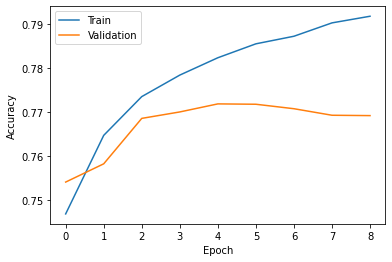

In [ ]:
plt.plot(values['accuracy'])
plt.plot(values['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

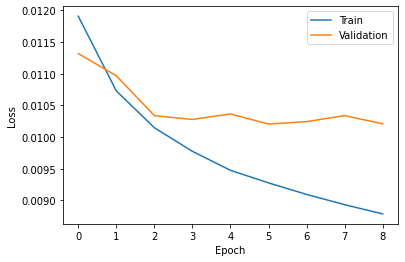

In [ ]:
plt.plot(values['loss'])
plt.plot(values['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')